<a href="https://colab.research.google.com/github/Hassan-293/My-Project/blob/main/Cancer_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls '/content/drive/MyDrive/Histo Data'

Consep		 lizard_images1  lizard_labels	   overlay
Label_Processed  lizard_images2  Masked_Processed  Train_Processed


In [ ]:
!mkdir '/content/drive/MyDrive/Histo Data/Label_Processed'

In [ ]:
from tensorflow import keras
import cv2


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

path ='/content/drive/MyDrive/Histo Data/lizard_images1/Lizard_Images1'
processed_path = '/content/drive/MyDrive/Histo Data/Train_Processed'

for filename in os.listdir(path):
    if filename.endswith('.png'):
        # Load the image
        image = cv2.imread(os.path.join(path, filename))

        # Resize the image
        image = cv2.resize(image, (256, 256))
        
        # Standardize the data by subtracting the mean and dividing by the standard deviation
        image = (image - np.mean(image)) / np.std(image)

        # Normalize the image
        image = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX)

        
        # Save the processed image
        cv2.imwrite(f'/content/drive/MyDrive/Histo Data/Train_Processed/'+ filename.split('/')[-1], image)
           

In [5]:

def display_image(image_path):
    # Load the image
    image = plt.imread(image_path)

    # Display the image
    plt.imshow(image)
    plt.show()

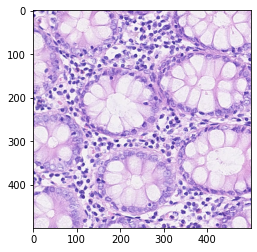

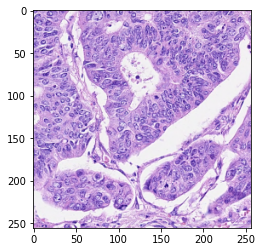

In [ ]:
Unprocessed_Image='/content/drive/MyDrive/Histo Data/lizard_images1/Lizard_Images1/consep_11.png'
Processed_Image= '/content/drive/MyDrive/Histo Data/Train_Processed/consep_1.png'

display_image(Unprocessed_Image)

display_image(Processed_Image)

In [ ]:
!git config --global user.email "shiekhhassan1234draq@gmail.com"
!git config --global user.name "Hassan-293"


In [ ]:
!git init

Initialized empty Git repository in /content/.git/


In [ ]:
!git add Cancer Detection.ipynb

fatal: pathspec 'Cancer' did not match any files


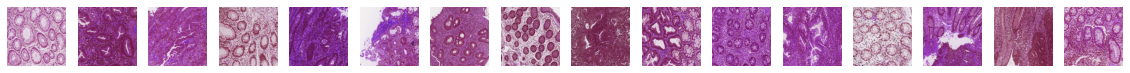

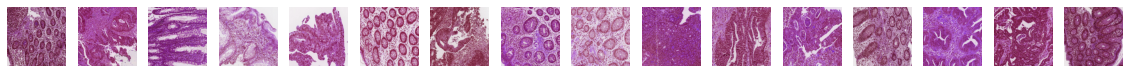

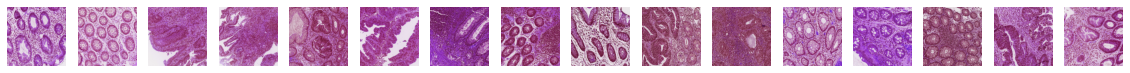

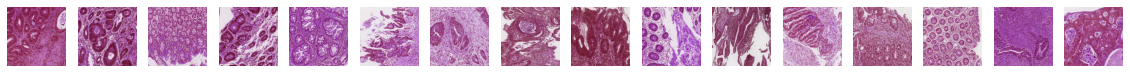

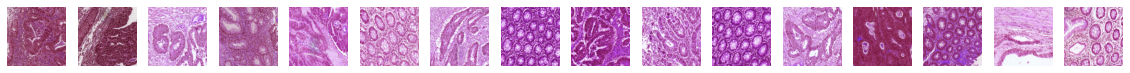

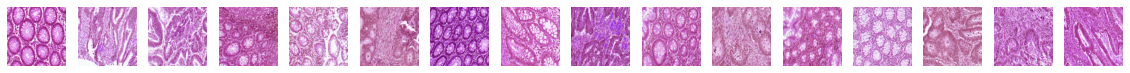

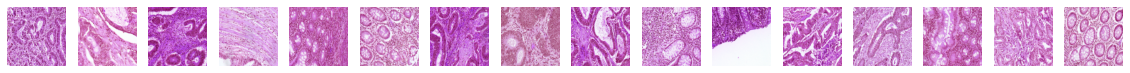

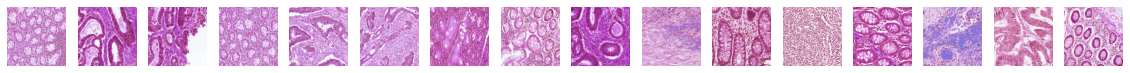

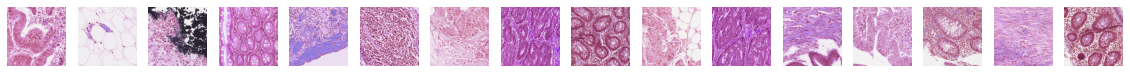

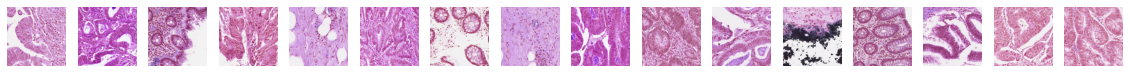

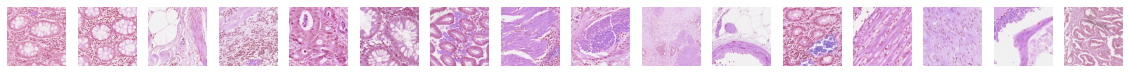

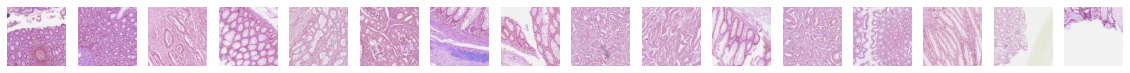

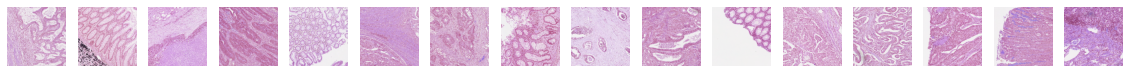

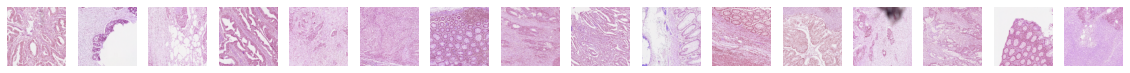

In [ ]:
import glob

# Find all the images in the folder
image_files = glob.glob('/content/drive/MyDrive/Histo Data/Train_Processed/*.png')

# Load the images in a list
images = []
for file in image_files:
    img = cv2.imread(file)
    images.append(img)

# Divide the images into batches
batch_size = 16
num_batches = len(images) // batch_size
for i in range(num_batches):
    batch_images = images[i * batch_size:(i + 1) * batch_size]
    # Plot the images
    fig, axs = plt.subplots(1, len(batch_images), figsize=(20, 5))
    for i, img in enumerate(batch_images):
        axs[i].imshow(img)
        axs[i].axis('off')
    plt.show()

In [ ]:
train_image_dir = r'/content/drive/MyDrive/Histo Data/Train_Processed'
train_mask_dir = r'/content/drive/MyDrive/Histo Data/lizard_labels/Lizard_Labels/Labels'

In [ ]:

train_image_paths = sorted([os.path.join(train_image_dir, fname) for fname in os.listdir(train_image_dir) if fname.endswith(".png") and not fname.startswith(".")])
train_mask_paths = sorted([os.path.join(train_mask_dir, fname) for fname in os.listdir(train_mask_dir) if fname.endswith(".mat") and not fname.startswith(".")])
print("Number of training images : ", len(train_image_paths))
print("Number of training masks : ", len(train_mask_paths))
     

Number of training images :  238
Number of training masks :  238


In [ ]:
print("After shuffling")
print(train_image_paths[0:5])
print(train_mask_paths[0:5])
# Sequence intact !

After shuffling
['/content/drive/MyDrive/Histo Data/Train_Processed/consep_1.png', '/content/drive/MyDrive/Histo Data/Train_Processed/consep_10.png', '/content/drive/MyDrive/Histo Data/Train_Processed/consep_11.png', '/content/drive/MyDrive/Histo Data/Train_Processed/consep_12.png', '/content/drive/MyDrive/Histo Data/Train_Processed/consep_13.png']
['/content/drive/MyDrive/Histo Data/lizard_labels/Lizard_Labels/Labels/consep_1.mat', '/content/drive/MyDrive/Histo Data/lizard_labels/Lizard_Labels/Labels/consep_10.mat', '/content/drive/MyDrive/Histo Data/lizard_labels/Lizard_Labels/Labels/consep_11.mat', '/content/drive/MyDrive/Histo Data/lizard_labels/Lizard_Labels/Labels/consep_12.mat', '/content/drive/MyDrive/Histo Data/lizard_labels/Lizard_Labels/Labels/consep_13.mat']


In [ ]:
# Splitting
train_image_files = train_image_paths[:190]
train_mask_files = train_mask_paths[:190]

valid_image_files = train_image_paths[190:]
valid_mask_files = train_mask_paths[190:]

print(len(train_image_files), len(train_mask_files))
print(len(valid_image_files), len(valid_mask_files))


190 190
48 48


In [ ]:
import scipy.io
import numpy as np
from PIL import Image

# Load the .mat file
mat_data = scipy.io.loadmat('/content/drive/MyDrive/Histo Data/lizard_labels/Lizard_Labels/Labels/consep_1.mat')

# Extract the masked dataset
masked_data = mat_data['centroid']

# Convert the masked dataset to an image
image_data = np.uint8(masked_data * 255)  # Scale to 0-255 and convert to uint8
image = Image.fromarray(image_data)  # Convert to image

# Save the resulting image dataset
image.save('image_dataset.jpg')

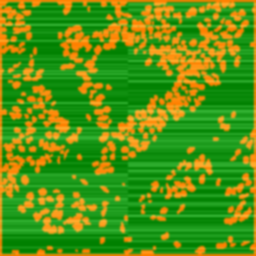

True

In [ ]:
from google.colab.patches import cv2_imshow  # import cv2_imshow for Google Colab

import cv2
import numpy as np
import os


# Load the images
img = cv2.imread('/content/drive/MyDrive/Histo Data/Dataset_Processed/consep_1.png')
label = cv2.imread('/content/drive/MyDrive/Histo Data/Super_Imposed/output_image.png')

output_folder = '/content/drive/MyDrive/Histo Data/Super_Imposed'



# Resize the label to the same size as the image
label = cv2.resize(label, (img.shape[1], img.shape[0]), interpolation=cv2.INTER_NEAREST)

# Convert the label to binary mask
label = cv2.cvtColor(label, cv2.COLOR_BGR2GRAY)
label = cv2.threshold(label, 1, 255, cv2.THRESH_BINARY)[1]

# Create a green background image
bg = np.zeros_like(img)
bg[:] = (0, 255, 0)

# Create a red overlay image using the label as a mask
overlay = np.zeros_like(img)
overlay[label > 0] = (0, 0, 255)

# Combine the images using the label as a mask
result = cv2.addWeighted(img, 0.5, bg, 0.5, 0.0)
result = cv2.addWeighted(result, 1.0, overlay, 1.0, 0.0)


result = cv2.GaussianBlur(result, (5, 5), 0)

# Define output image path
output_path = os.path.join(output_folder, 'output_image_2.png')


# Display the resulting image using cv2_imshow
cv2_imshow(result)

cv2.imwrite(output_path, result)



In [3]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

path ='/content/drive/MyDrive/Histo Data/Labels'
processed_path = '/content/drive/MyDrive/Histo Data/Dataset_Processed'

for filename in os.listdir(path):
    if filename.endswith('.png'):
        # Load the image
        image = cv2.imread(os.path.join(path, filename))

        # Resize the image
        image = cv2.resize(image, (256, 256))
        
        # Standardize the data by subtracting the mean and dividing by the standard deviation
        image = (image - np.mean(image)) / np.std(image)

        # Normalize the image
        image = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX)

        
        # Save the processed image
        cv2.imwrite(f'/content/drive/MyDrive/Histo Data/Labels_Processesd/'+ filename.split('/')[-1], image)
           

In [4]:
Processed_Label = '/content/drive/MyDrive/Histo Data/Labels/consep_7.png'
UnProcessed_Label = '/content/drive/MyDrive/Histo Data/Labels_Processesd/consep_7.png'

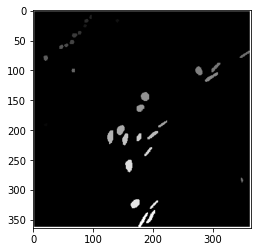

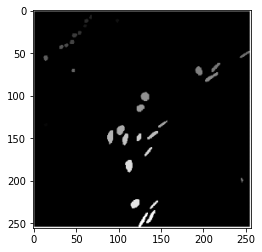

In [6]:
display_image(Processed_Label)
display_image(UnProcessed_Label)

In [11]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

path ='/content/drive/MyDrive/Histo Data/Label_Craig'
processed_path = '/content/drive/MyDrive/Histo Data/Labels_Processesd'

for filename in os.listdir(path):
    if filename.endswith('.png'):
        # Load the image
        image = cv2.imread(os.path.join(path, filename))

        # Resize the image
        image = cv2.resize(image, (256, 256))
        
        # Standardize the data by subtracting the mean and dividing by the standard deviation
        image = (image - np.mean(image)) / np.std(image)

        # Normalize the image
        image = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX)

        
        # Save the processed image
        cv2.imwrite(f'/content/drive/MyDrive/Histo Data/Labels_Processesd/'+ filename.split('/')[-1], image)
           

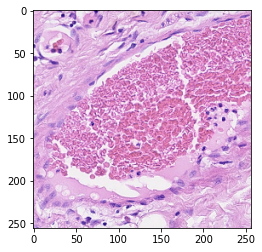

In [12]:
display_image('/content/drive/MyDrive/Histo Data/Train_Processed/consep_16.png')


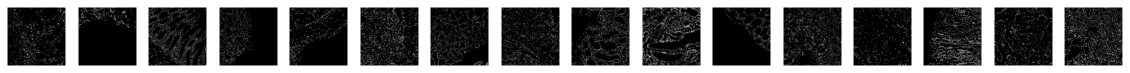

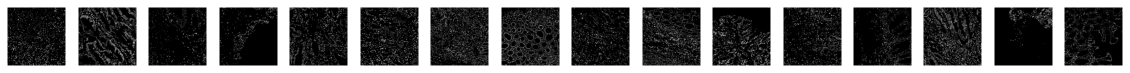

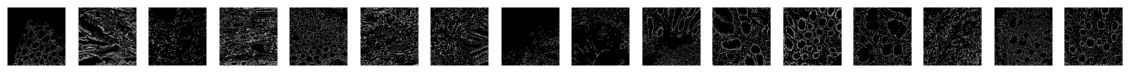

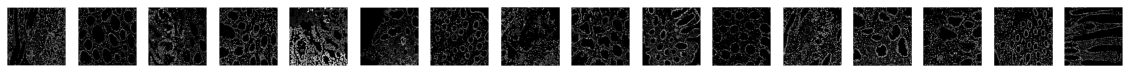

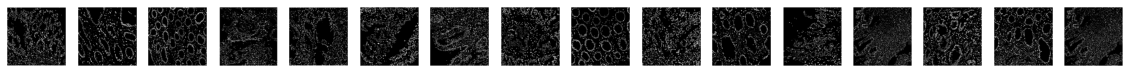

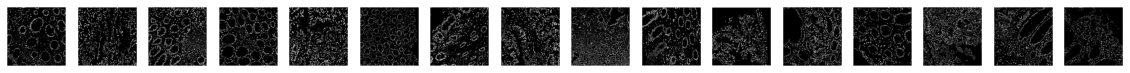

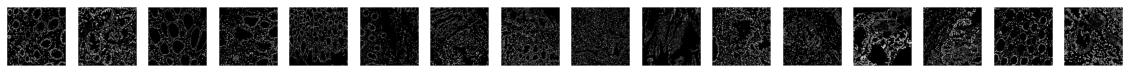

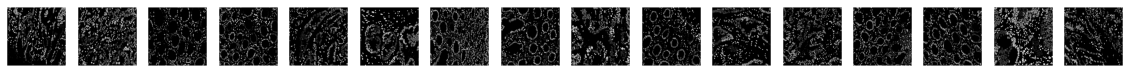

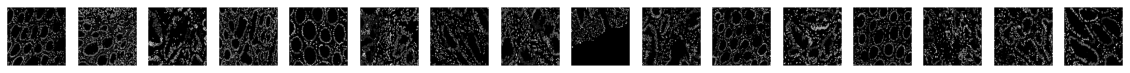

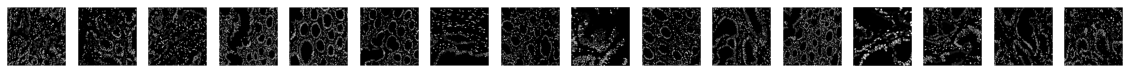

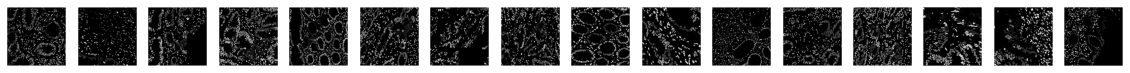

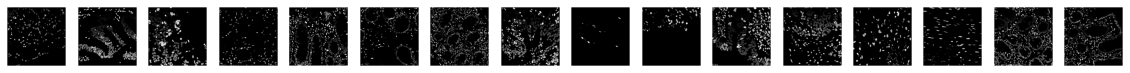

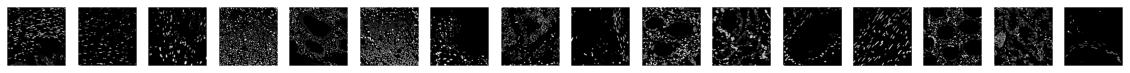

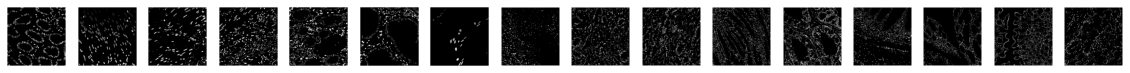

In [14]:
import glob
# Find all the images in the folder
image_files = glob.glob('/content/drive/MyDrive/Histo Data/Labels_Processesd/*.png')

# Load the images in a list
images = []
for file in image_files:
    img = cv2.imread(file)
    images.append(img)

# Divide the images into batches
batch_size = 16
num_batches = len(images) // batch_size
for i in range(num_batches):
    batch_images = images[i * batch_size:(i + 1) * batch_size]
    # Plot the images
    fig, axs = plt.subplots(1, len(batch_images), figsize=(20, 5))
    for i, img in enumerate(batch_images):
        axs[i].imshow(img)
        axs[i].axis('off')
    plt.show()